## GRU - With RDA data representation approach *Angle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

import tensorflow as tf
from tensorflow.keras.models import load_model


In [2]:
to_store_path = r'D:\2 Thesis\2 models\2023.07.02 all models\GRU_02\prediction csv\v1_gru_pred_output_rr_angle.csv'

In [3]:
X_train = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\1 train\data_2019_train_X_v8_out.npy')
Y_train_angle =np.load(r'D:\2 Thesis\1 train datasets\2 train rda\1 train\data_2019_train_Y_v8_rr_angle_out.npy')

X_val = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\2 val\data_2019_11_X.npy')
Y_val_angle = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\2 val\data_2019_11_Y_array_rr_angle_m.npy')

X_test = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\3 test\data_2019_12_X.npy')
Y_test_angle = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\3 test\data_2019_12_Y_array_rr_angle_m.npy')


In [4]:
## Checkpoint save - relative angle
checkpoint_filepath_angle = r'D:\2 Thesis\2 models\2023.07.02 all models\GRU_02\best model rda ds\gru_rr_angle_best_model_v1.h5'

In [5]:
X_train = X_train.astype("float32") 
Y_train_angle = Y_train_angle.astype("float32") 


X_val = X_val.astype("float32") 
Y_val_angle = Y_val_angle.astype("float32") 

In [6]:
from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y


In [7]:
train_gen_angle = DataGenerator(X_train, Y_train_angle, 200)
val_gen_angle = DataGenerator(X_val, Y_val_angle, 200)

In [8]:
def gru_model(n_steps_input, n_steps_output, n_features):
    model = Sequential()
    model.add(GRU(74, activation="tanh", input_shape=(n_steps_input, n_features), return_sequences=True))
    model.add(GRU(74, activation="tanh", return_sequences=True))
    model.add(Dense(2))
    return model

model_rel_angle = gru_model(n_steps_input = 10, n_steps_output = 10  , n_features = 8 )
model_rel_angle.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 74)            18648     
                                                                 
 gru_1 (GRU)                 (None, 10, 74)            33300     
                                                                 
 dense (Dense)               (None, 10, 2)             150       
                                                                 
Total params: 52,098
Trainable params: 52,098
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model
model_rel_angle.compile(optimizer= Adam(learning_rate = 0.0001), loss = 'mean_squared_error', metrics=['mae'] ) 
checkpoint_rel_angle = ModelCheckpoint(checkpoint_filepath_angle, monitor='val_loss', save_best_only=True, mode='min')

# Train the model
history_angle = model_rel_angle.fit(train_gen_angle, validation_data = val_gen_angle, epochs=20, verbose=1, callbacks = [checkpoint_rel_angle])  


Epoch 1/20
54621/54621 [==============================] - 881s 16ms/step - loss: 0.0533 - mae: 0.1047 - val_loss: 0.0514 - val_mae: 0.0968
Epoch 2/20
54621/54621 [==============================] - 878s 16ms/step - loss: 0.0502 - mae: 0.0996 - val_loss: 0.0500 - val_mae: 0.0914
Epoch 3/20
54621/54621 [==============================] - 865s 16ms/step - loss: 0.0490 - mae: 0.0975 - val_loss: 0.0484 - val_mae: 0.0931
Epoch 4/20
54621/54621 [==============================] - 875s 16ms/step - loss: 0.0479 - mae: 0.0962 - val_loss: 0.0476 - val_mae: 0.1016
Epoch 5/20
54621/54621 [==============================] - 882s 16ms/step - loss: 0.0469 - mae: 0.0950 - val_loss: 0.0465 - val_mae: 0.0907
Epoch 6/20
54621/54621 [==============================] - 877s 16ms/step - loss: 0.0461 - mae: 0.0939 - val_loss: 0.0457 - val_mae: 0.0890
Epoch 7/20
54621/54621 [==============================] - 895s 16ms/step - loss: 0.0454 - mae: 0.0930 - val_loss: 0.0449 - val_mae: 0.0867
Epoch 8/20
54621/54621 [===

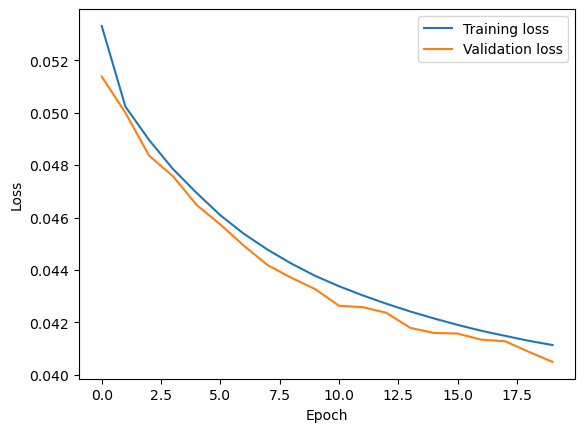

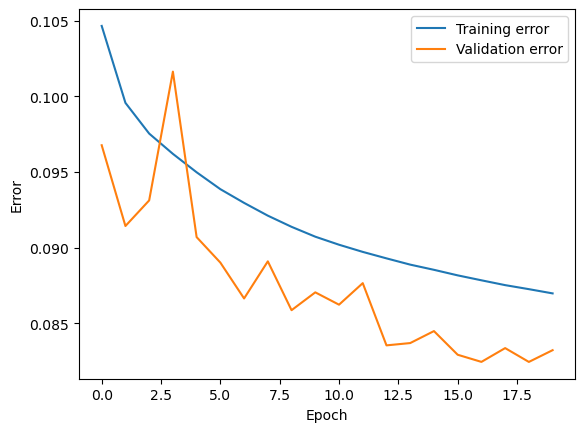

In [10]:
# Plot the training and validation loss
plt.plot(history_angle.history['loss'], label='Training loss')
plt.plot(history_angle.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation error
plt.plot(history_angle.history['mae'], label='Training error')
plt.plot(history_angle.history['val_mae'], label='Validation error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [11]:
from tensorflow.keras.models import load_model

best_model_angle = load_model(checkpoint_filepath_angle)

In [12]:
# Evaluate the model
Y_test_pred_angle = best_model_angle.predict(X_test)

28322/28322 [==============================] - 122s 4ms/step


In [13]:
Y_test_angle = Y_test_angle.squeeze()

In [14]:
Y_test_angle.shape

(906289, 10, 2)

In [16]:
# Calculate the mean squared error
mse_rel_angle = np.mean(np.square(Y_test_angle - Y_test_pred_angle))
print("Mean Squared Error of test_pred_relative angle is :", mse_rel_angle)

Mean Squared Error of test_pred_relative angle is : 0.0342745057314128


In [17]:

# Reshape the array to (9062890, 2)
Y_test_pred_angle_arr = np.reshape(Y_test_pred_angle, (9062890, 2))
Y_test_angle_arr = np.reshape(Y_test_angle, (9062890, 2))

# Create a DataFrame with column names
Y_test_pred_angle_df = pd.DataFrame(Y_test_pred_angle_arr, columns=["sin_rangle_pred", "cos_rangle_pred"])
Y_test_angle_df = pd.DataFrame(Y_test_angle_arr, columns=["sin_rangle", "cos_rangle"])
# Print the DataFrame


In [18]:
Y_test_angle_all_df = pd.concat([Y_test_pred_angle_df, Y_test_angle_df], axis=1)

In [20]:
Y_test_angle_all_df.to_csv(to_store_path)
